## Final Project Submission

Please fill out:
* Student name: Nyla Duperval
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger
* Blog post URL:

Lights, Camera, ACTION! 

Since the 1890s, the film industry has provided a gateway to learning, communion and exploration. With the advancement of technology, the film industry has changed specifically the monetary input. A successful file requires a sucessful a team of writers, cinematographers, editors etc. To determine if Microsoft should enter the film industry, lets take a look at how much does it will cost to make a successful movie. Success will be determined by the comparison of production budget and gross(domestic & worldwide). 

In [51]:
# Your code here - remember to use markdown cells for comments as well!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
tn_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', index_col='movie') 

Data Cleaning

In [53]:
tn_budgets.dtypes

id                    int64
release_date         object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [54]:
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)
#Changed dtype

In [55]:
tn_budgets['release_date'] = tn_budgets['release_date'].str.replace(',', '')
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])
tn_budgets['Year'] = tn_budgets['release_date'].dt.year
#Changed dtype and created new column

In [56]:
tn_budgets = tn_budgets.drop('id',1)

In [57]:
tn_budgets.dtypes

release_date         datetime64[ns]
production_budget             int32
domestic_gross                int32
worldwide_gross             float64
Year                          int64
dtype: object

In [59]:
tn_budgets[tn_budgets.duplicated(keep=False)].sort_values(by='Year')

,release_date,production_budget,domestic_gross,worldwide_gross,Year
movie,,,,,
Chicago Overcoat,2009-12-31,3000000,0,0.0,2009
Four Single Fathers,2009-12-31,3000000,0,0.0,2009
Diamond Ruff,2014-12-31,500000,0,0.0,2014
The Sound and the Shadow,2014-12-31,500000,0,0.0,2014


In [67]:
tn_budgets = tn_budgets[tn_budgets.duplicated()] 

In [68]:
tn_budgets[tn_budgets.duplicated(keep=False)].sort_values(by='Year')

,release_date,production_budget,domestic_gross,worldwide_gross,Year
movie,,,,,


In [69]:
tn_budgets.isna().sum()

release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
Year                 0
dtype: int64

In [71]:
tn_budgets[(tn_budgets['domestic_gross'] == 0) & (tn_budgets['worldwide_gross'] == 0 )]

,release_date,production_budget,domestic_gross,worldwide_gross,Year
movie,,,,,
Four Single Fathers,2009-12-31,3000000,0,0.0,2009
The Sound and the Shadow,2014-12-31,500000,0,0.0,2014


In [72]:
#What is the average budget per year? Lets find out!
grouped_budget = tn_budgets.groupby(['Year'])['production_budget'].mean()
grouped_budget.head()

Year
2009    3000000
2014     500000
Name: production_budget, dtype: int32

In [73]:
pivoted = grouped_budget.pivot(index='Year', columns='movie', values='production_budget')
pivoted

AttributeError: 'Series' object has no attribute 'pivot'

In [52]:
#What is the middle 
grouped_dom = tn_budgets.groupby('Year')['domestic_gross'].median()
grouped_dom

Year
1915    10000000.0
1916     4000000.0
1920     3000000.0
1925    10000000.0
1927           0.0
           ...    
2016    18704596.0
2017    26932488.0
2018    39282227.0
2019    16790790.0
2020           0.0
Name: domestic_gross, Length: 96, dtype: float64

In [51]:
grouped_wor = tn_budgets.groupby('Year')['worldwide_gross'].median()
grouped_wor

Year
1915    11000000.0
1916     4000000.0
1920     3000000.0
1925    15500000.0
1927           0.0
           ...    
2016    38985577.0
2017    53546916.5
2018    66295121.0
2019    19789712.0
2020           0.0
Name: worldwide_gross, Length: 96, dtype: float64

Data Exploration

In [19]:
mark = (tn_budgets['domestic_gross'] > 0) & (tn_budgets['worldwide_gross'] > 0 ) 
new_df = tn_budgets[mark].drop('id',1)
new_df
#I created a new dateframe with only movies with domestic and worldwide gross greater than 0

,release_date,production_budget,domestic_gross,worldwide_gross,year_of_release
movie,,,,,
Avatar,2009-12-18,425000000,760507625,2.776345e+09,2009-01-01
Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,241063875,1.045664e+09,2011-01-01
Dark Phoenix,2019-06-07,350000000,42762350,1.497624e+08,2019-01-01
Avengers: Age of Ultron,2015-05-01,330600000,459005868,1.403014e+09,2015-01-01
Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000,620181382,1.316722e+09,2017-01-01
...,...,...,...,...,...
Cavite,2006-05-26,7000,70071,7.164400e+04,2006-01-01
The Mongol King,2004-12-31,7000,900,9.000000e+02,2004-01-01
Following,1999-04-02,6000,48482,2.404950e+05,1999-01-01


In [11]:
movie_year = new_df[(new_df['year_of_release'] >= '2010') & (new_df['year_of_release'] <= '2020')]
movie_year
#I created a dataframe with movies with year of release between 2010-2020

,release_date,production_budget,domestic_gross,worldwide_gross,year_of_release
movie,,,,,
Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,241063875,1.045664e+09,2011-01-01
Dark Phoenix,2019-06-07,350000000,42762350,1.497624e+08,2019-01-01
Avengers: Age of Ultron,2015-05-01,330600000,459005868,1.403014e+09,2015-01-01
Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000,620181382,1.316722e+09,2017-01-01
Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000,936662225,2.053311e+09,2015-01-01
...,...,...,...,...,...
Krisha,2016-03-18,30000,144822,1.448220e+05,2016-01-01
Down Terrace,2010-10-15,30000,9812,9.812000e+03,2010-01-01
Emily,2017-01-27,27000,3547,3.547000e+03,2017-01-01


In [14]:
movie_gross = movie_year[movie_year['year_of_release'] == '2015']
movie_gross

,release_date,production_budget,domestic_gross,worldwide_gross,year_of_release
movie,,,,,
Avengers: Age of Ultron,2015-05-01,330600000,459005868,1.403014e+09,2015-01-01
Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000,936662225,2.053311e+09,2015-01-01
Spectre,2015-11-06,300000000,200074175,8.796209e+08,2015-01-01
Jurassic World,2015-06-12,215000000,652270625,1.648855e+09,2015-01-01
Furious 7,2015-04-03,190000000,353007020,1.518723e+09,2015-01-01
...,...,...,...,...,...
Antarctic Edge: 70Âº South,2015-04-17,150000,7193,7.193000e+03,2015-01-01
Top Spin,2015-08-21,150000,5858,5.858000e+03,2015-01-01
The Gallows,2015-07-10,100000,22764410,4.165647e+07,2015-01-01


In [17]:
movie_gross.median()

production_budget    20000000.0
domestic_gross       18031891.0
worldwide_gross      39762671.5
dtype: float64

In [18]:
movie_gross.mean()

production_budget    3.940147e+07
domestic_gross       5.190165e+07
worldwide_gross      1.326961e+08
dtype: float64

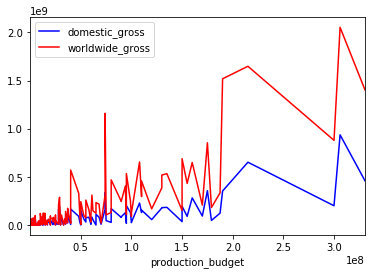

In [15]:
ax = plt.gca()

movie_gross.plot(kind = 'line', x = 'production_budget', y = 'domestic_gross', color = 'blue', ax=ax)
movie_gross.plot(kind = 'line', x = 'production_budget', y = 'worldwide_gross', color = 'red', ax=ax)

plt.title('Production Cost vs Gross')

plt.xlabel('Gross')
plt.ylabel()

plt.show()